In [1]:
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.datasets import make_moons
from scipy.cluster.hierarchy import dendrogram
from IPython.core.display import Image

In [2]:
df = gpd.read_file("counties.geojson")

# Part 1: Clustering Counties (Agglomerative)

<AxesSubplot:>

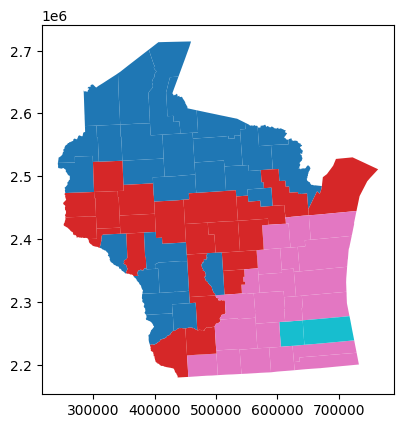

In [3]:
c = AgglomerativeClustering(4)
groups = c.fit_predict(df[["forest", "crops", "pasture", "developed"]])
df.plot(column=groups, cmap="tab10")

### Tree Recursion: Node Count

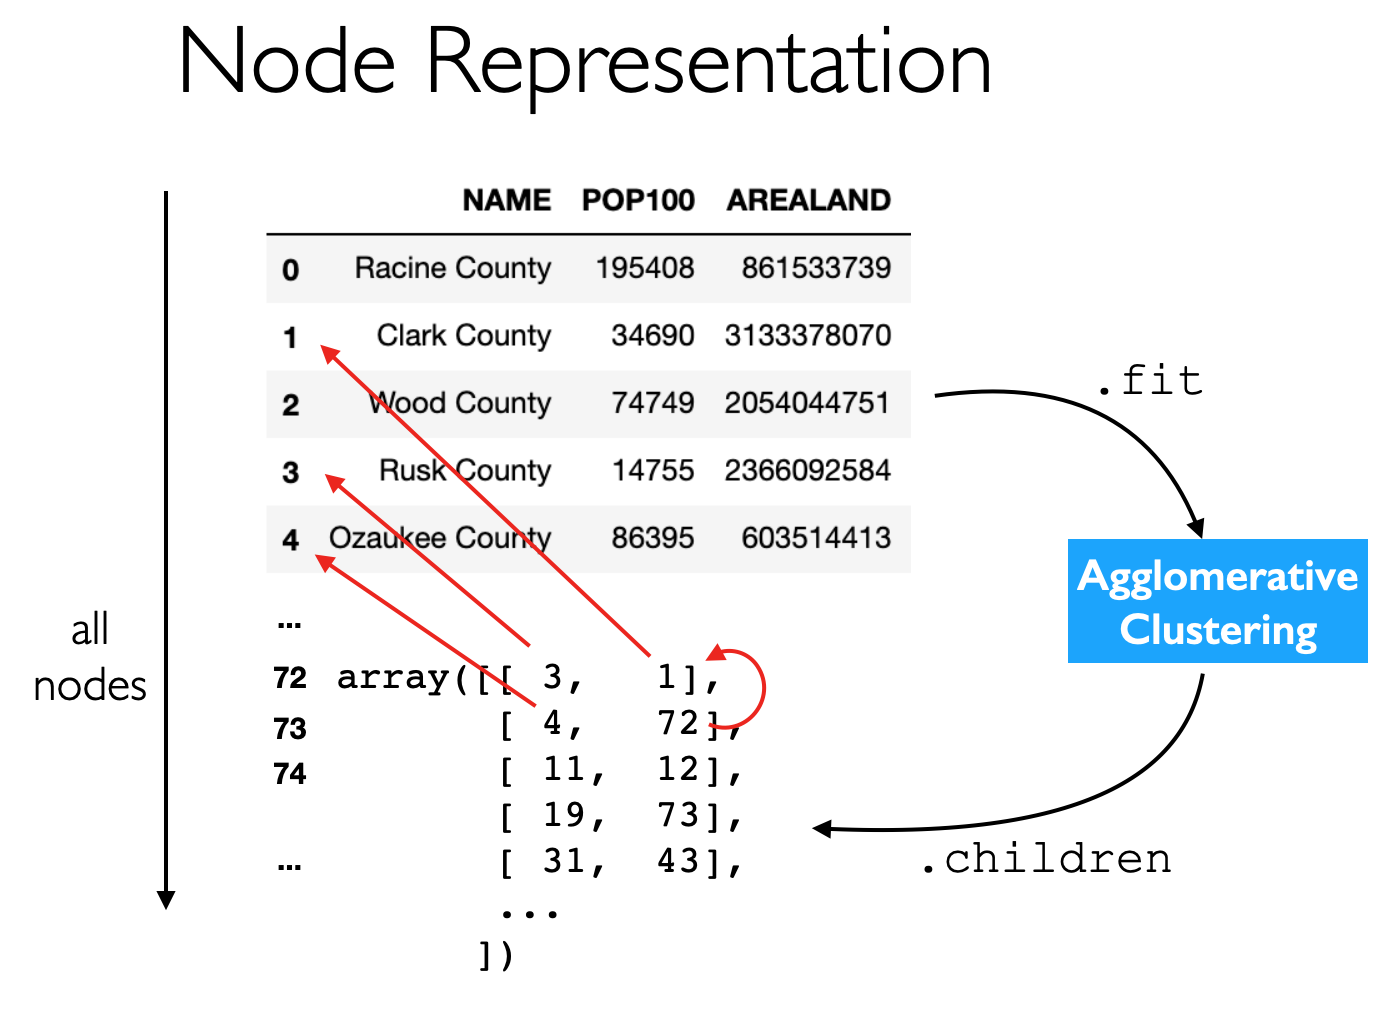

In [4]:
Image("children.png", width=400)

### Linkage Matrix => Dendrogram

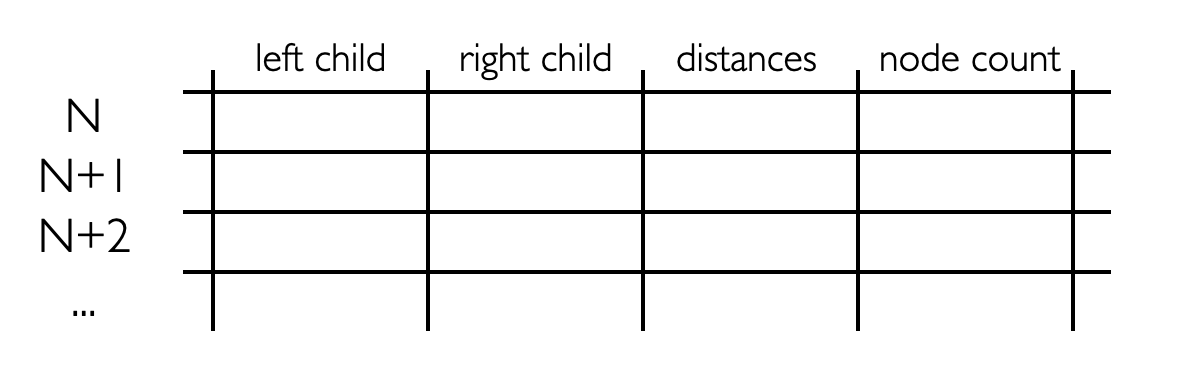

In [5]:
Image("linkage.png", width=400)

# Part 2: What approach to use for each problem?
* KMeans
* AgglomerativeClustering
* PCA

### Problem 1: predict Sunday bike traffic based on a 2 metrics summarizing the last 6 days

In [6]:
from sklearn.decomposition import PCA
df = pd.read_csv("bikes.csv").set_index("week")
df.head()

,1,2,3,4,5,6,7
week,,,,,,,
2015-27,2344.0,2970.0,3900.0,3227.0,3313.0,3427.0,3279.0
2015-28,1547.0,2974.0,3265.0,3611.0,3638.0,3324.0,3751.0
2015-29,1888.0,2939.0,3527.0,1303.0,2467.0,2054.0,3332.0
2015-30,2277.0,3529.0,3539.0,3272.0,2775.0,3820.0,2688.0
2015-31,2889.0,2915.0,2910.0,3263.0,2998.0,3471.0,2291.0


In [7]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.linear_model import LinearRegression
train, test = train_test_split(df, test_size=0.5, random_state=320)

model = Pipeline([
    # TRANSFORMER?
    ("lr", LinearRegression()),
])

scores = cross_val_score(model, train.loc[:, "1":"6"], train["7"])
print(scores.mean(), scores.std())

0.6479146678831346 0.0881032698568585


### Problem 2: redraw an image more simply, using only 4 colors

(688, 600, 3)


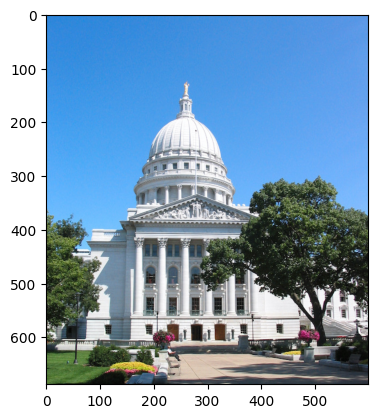

In [8]:
import matplotlib.pyplot as plt
img = plt.imread("capital.jpg")
print(img.shape)
plt.imshow(img)

### Problem 3: show a tree of COVID variants

In [9]:
covid = (~pd.read_csv("variants.csv").set_index("Variant").isna()).astype(int)
covid.head()

,F 306,R 346,V 367,P 384,Q 414,K 417,N 439,N 440,Y 449,N 450,L 452,S 477,T 478,V 483,E 484,F 490,S 494,N 501,E 516
Variant,,,,,,,,,,,,,,,,,,,
R.1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
P.3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
P.2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
C.36.3,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
C.36+L452R,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
